# Data preprocessing on Titanic dataset

## Submitted by *Ashmina T.*

**Objective:** Do the following on titanic dataset.
1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column
3. Check the basic details of the dataset
4. Fill in all the missing values present in all the columns in the dataset
5. Check and handle outliers in at least 3 columns in the dataset
6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

### 1. Load the dataset into python environment

In [2]:
#loading the dataset
data = pd.read_csv('titanic_dataset.csv')

In [3]:
#displaying first 5 rows
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


This dataset contains information about the passengers of the Titanic shipinclude passenger information like name, age, gender, socio-economic class, etc. and will reveal whether they survived or not.

**Variable Description**
1. PassengerId : unique id denoting each passenger
2. Survived : passenger survived(1) or died(0)
3. Pclass : passenger class, a proxy for socio-economic status (1:Upper class, 2:Middle class, 3:Lower class)
4. Name : name
5. Sex : gender of passenger
6. Age : age of passenger
7. SibSp : number of siblings/spouses aboard the titanic
8. Parch :number of parents/children aboard the titanic
9. Ticket : Ticket number
10. Fare : amount of money spent on ticket
11. Cabin : Cabin number
12. Embarked : port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

### 2. Make ‘PassengerId’ as the index column

In [4]:
#setting PassengerId column as index
data.set_index('PassengerId',inplace=True)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3. Check the basic details of the dataset

In [5]:
#getting the shape of the dataset
data.shape

(891, 11)

There are 891 rows and 11 columns in the dataset

This dataset contains the details of a subset of the passengers(891) who boarded the Titanic ship.

In [6]:
#getting a concise summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


There are 4 columns of type integer, 2 columns of type float, and 5 columns of type object. Some columns are containing non-null entries less than 891, and that indicates the absence of some values in the dataset(missing values).

In [7]:
#checking for null values
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

There are a total of 866 values missing in the dataset. 177 in the Age column, 687 in the Cabin column, and 2 in the Embarked column

### 4. Fill in all the missing values present in all the columns in the dataset

**Filling missing values in Age column**

In [8]:
#calculating the percentage of missing values in Age column
missing_count = data['Age'].isna().sum()
missing_percent = (missing_count / len(data))*100
print("Percentage of missing values in Age column :",round(missing_percent,2))

Percentage of missing values in Age column : 19.87


Since only 19% of the values in Age column are missing, we can impute the values rather than droping the column.  

>We can impute missing ages by calculating mean age of a group of 'similar passengers'. For e.g., we could choose to calculate mean of Pclass1 passengers and assign it to all Pclass1 missing ages.
But it is quite likely that females on Pclass3 have a diff mean age than females on Pclass 1. So an even better approach is to group people based on Sex, PClass.

In [9]:
#grouping the dataset based on Sex and Pclass
sex_Pclass = data.groupby(['Sex', 'Pclass'])

#defining a function that imputes missing Age value in a group by the median age of that group
def impute_median(x):
    return x.fillna(x.median())
#applying the above function on each group
data.Age = sex_Pclass['Age'].apply(impute_median)

**Filling missing values in Cabin column**

In [10]:
#calculating the percentage of missing values in Cabin column
missing_count = data['Cabin'].isna().sum()
missing_percent = (missing_count / len(data))*100
print("Percentage of missing values in Cabin column :",round(missing_percent,2))

Percentage of missing values in Cabin column : 77.1


More than 50% of values in Cabin column are missing. So, we can drop that column from our dataset.

In [11]:
#droping Cabin column
data.drop('Cabin',axis=1,inplace=True)

**Filling missing values in Embarked column**

In [12]:
#calculating the count of null values present in the Embarked column
missing_count = data['Embarked'].isna().sum()
print("Number of missing values in Embarked column:",missing_count)

Number of missing values in Embarked column: 2


Only 2 values are missing in Embarked column. So, we can impute those values using mode value of the Embarked column. Mode value is chosen since the Embarked column is a categorical one.

In [13]:
#calculating the mode
most_freq = data.Embarked.mode()
print("The most frequent category in Embarked column is '{}'(indicating Southampton)".format(most_freq[0]))

The most frequent category in Embarked column is 'S'(indicating Southampton)


In [14]:
#imputing missing values using 'S'
data['Embarked'].fillna('S',inplace=True)

In [15]:
#checking if all the missing values are handled properly
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

Now our dataset is free from missing values.

### 5. Check and handle outliers in at least 3 columns in the dataset

In [16]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

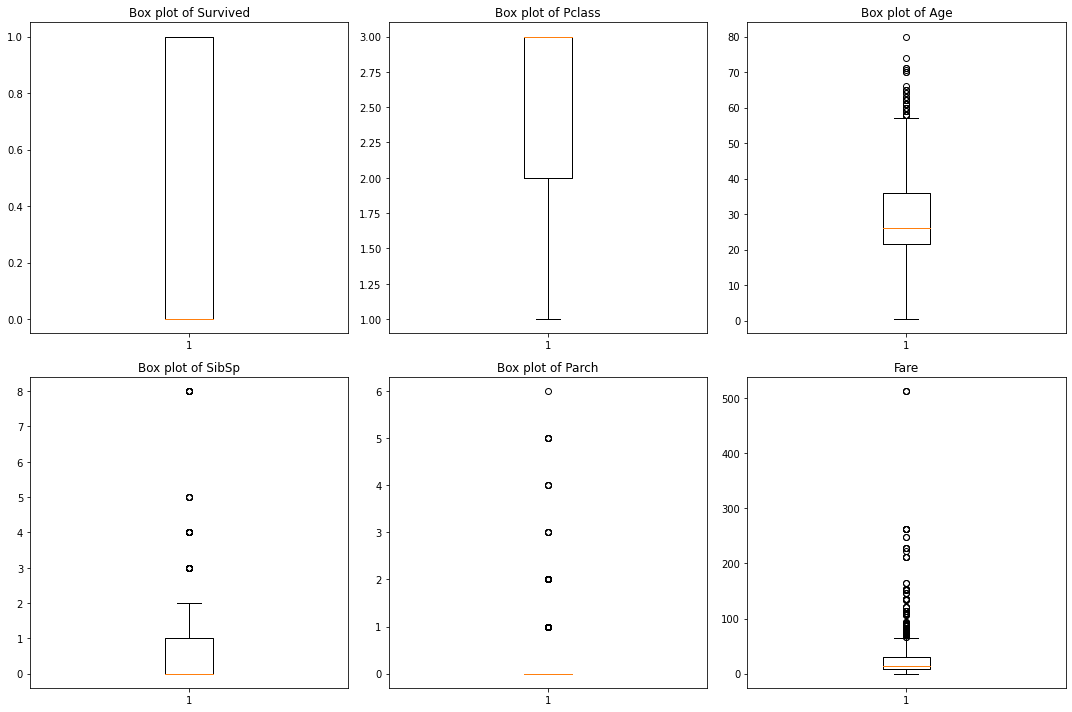

In [17]:
#boxplot for detecting outliers
plt.figure(figsize = (15,10))

#boxplot for Survived column
plt.subplot(2,3,1)
plt.boxplot(data['Survived'])
plt.title('Box plot of Survived')

#boxplot for Pclass column
plt.subplot(2,3,2)
plt.boxplot(data['Pclass'])
plt.title('Box plot of Pclass')

#boxplot for Age column
plt.subplot(2,3,3)
plt.boxplot(data['Age'])
plt.title('Box plot of Age')

#boxplot for  column
plt.subplot(2,3,4)
plt.boxplot(data['SibSp'])
plt.title('Box plot of SibSp')

#boxplot for Parch column
plt.subplot(2,3,5)
plt.boxplot(data['Parch'])
plt.title('Box plot of Parch')

#boxplot for Fare column
plt.subplot(2,3,6)
plt.boxplot(data['Fare'])
plt.title('Fare')

plt.tight_layout()
plt.show()

There are outliers in the columns 'Age','Fare','SibSp', and 'Parch'.

**Handling outliers in Age column**

In [18]:
data.Age.describe()

count    891.000000
mean      29.112424
std       13.304424
min        0.420000
25%       21.500000
50%       26.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

C:\Users\ASHIQUE\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

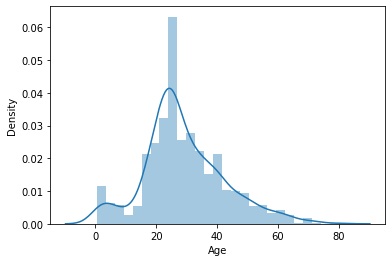

In [19]:
sns.distplot(data['Age'])

Minimum age is 0 and maximum age is 80, that is quiet normal. So we don't have to consider those datapoints as an outlier.

**Handling outliers in Fare column**

In [20]:
#handling outliers in Fare column using Percentiles
#extracting Fare column
fare_data = data['Fare']

#finding quartiles
q1 = np.percentile(fare_data,25)
q3 = np.percentile(fare_data,75)

#calculating inter quartile range
IQR = q3-q1

#calculating lower and upper limits
lower = q1-1.5*IQR
upper = q3+1.5*IQR

#removing values outside the limits(outliers)
#identifying the outlier
outlier = []
for x in fare_data:
    if ((x>upper) or (x<lower)):
        outlier.append(x)
print("Outlier:",outlier)
outlier_indx = data.loc[(data['Fare']>upper) | (data['Fare']<lower)].index
print("Index of outlier:",outlier_indx)

Outlier: [71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]
Index of outlier: Int64Index([  2,  28,  32,  35,  53,  62,  

There are many outliers in the Fare column. So deleting that rows is not a convenient option.  
We can impute that using Quantile capping and flooring.  
The data points that are lesser than lower limit(q1-1.5\*IQR) are replaced with the lower limit value and the data points that are greater than upper limit(q3+1.5\*IQR) are replaced with the upper limit value.

In [21]:
#capping/flooring the outlier at the upper and lower limits
data['Fare'] = np.where(data['Fare']>upper,upper,
                                     np.where(data['Fare']<lower,lower,data['Fare']))
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


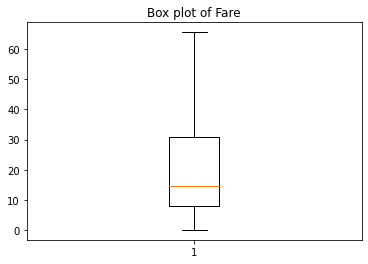

In [22]:
#checking if the outlier is handled successfully or not
plt.boxplot(data['Fare'])
plt.title('Box plot of Fare')
plt.show()

**Handling outliers in SibSp column**

In [23]:
data['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [24]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

SibSp is containing 7 unique values. we dont have to consider that as an outlier

### 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [25]:
#getting column names
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

Here, the column 'Survived' should be taken as the target feature as it indicates whether the passenger survived the Titanic shipwreck or not.  
We can drop the columns 'Name', 'Ticket' as they does not have any visible impact on the target column.  
All other columns together can be taken as the feature matrix.

In [26]:
#target vector
y = data['Survived']

#feature matrix
X = data.drop(['Survived','Name','Ticket'],axis=1)

In the feature matrix, the columns 'Sex' and 'Embarked' are categorical. So, we have to convert it into numeric form(machine-readable form) before feeding it to the ML model. For that we use one-hot encoding.

In [27]:
#one-hot encoding
X = pd.get_dummies(X, columns=['Sex','Embarked'])
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,38.0,1,0,65.6344,1,0,1,0,0
3,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,35.0,1,0,53.1000,1,0,0,0,1
5,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
887,2,27.0,0,0,13.0000,0,1,0,0,1
888,1,19.0,0,0,30.0000,1,0,0,0,1
889,3,21.5,1,2,23.4500,1,0,0,0,1


In [28]:
#getting statistical summary of the feature matrix
X.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.112424,0.523008,0.381594,24.046813,0.352413,0.647587,0.188552,0.086420,0.725028
std,0.836071,13.304424,1.102743,0.806057,20.481625,0.477990,0.477990,0.391372,0.281141,0.446751
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.500000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,26.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,36.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,65.634400,1.000000,1.000000,1.000000,1.000000,1.000000


Different columns in the feature matrix are in different scales. We should standardize the independent features in the data in a fixed range. Here we are going to use min max scaling for this purpose.

In [29]:
#creating an instance of min max scaler
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))

#applying min max scaler on X
X = min_max.fit_transform(X)

#converting it into dataframe
X = pd.DataFrame(X)

#checking statistical summary
X.describe()

,0,1,2,3,4,5,6,7,8,9
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.654321,0.360548,0.065376,0.063599,0.366375,0.352413,0.647587,0.188552,0.086420,0.725028
std,0.418036,0.167183,0.137843,0.134343,0.312056,0.477990,0.477990,0.391372,0.281141,0.446751
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.264891,0.000000,0.000000,0.120522,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.321438,0.000000,0.000000,0.220223,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.447097,0.125000,0.000000,0.472313,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
#linear regression model
#splitting data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)

#importing model
from sklearn import linear_model
lr = linear_model.LinearRegression()

#training the model
model = lr.fit(X_train,y_train)

#testing the model
predictions = model.predict(X_test)

#calculating MSE
from sklearn.metrics import mean_squared_error
print("MSE is:",mean_squared_error(y_test,predictions))

#calculating R-square value
from sklearn.metrics import r2_score
print('R squared value is:',r2_score(y_test,predictions))

MSE is: 0.1326000230543121
R squared value is: 0.4531998277112981
